### Google Drive requirements:
1. `adain` package
2. `vgg19-norm.pth` file with VGG19 weights
3. `model.pth` file with pretrained StyleTransferNetwork

In [13]:
from google.colab import drive, files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
import os
import sys

path2drive = '/content/drive/MyDrive'
path2vgg = os.path.join(path2drive, 'vgg19-norm.pth')
path2model = os.path.join(path2drive, 'model.pth')
output_dir = os.path.join(path2drive, 'output')

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

sys.path.append(path2drive)

In [15]:
_ = files.upload()  # e.g. images folder content

Saving woman with a hat.jpg to woman with a hat (1).jpg
Saving woman.jpeg to woman (1).jpeg
Saving picasso.jpg to picasso (1).jpg
Saving pencil 3.jpg to pencil 3 (1).jpg
Saving pencil 2.jpg to pencil 2 (1).jpg
Saving pencil 1.jpg to pencil 1 (1).jpg
Saving lightning.jpg to lightning (1).jpg
Saving dancing.jpg to dancing (1).jpg
Saving cornell university.jpg to cornell university (1).jpg


In [16]:
from adain import *

In [17]:
model = StyleTransferNetwork(path2vgg).eval().to(DEVICE)
model.load_state_dict(torch.load(path2model, map_location=DEVICE))

<All keys matched successfully>

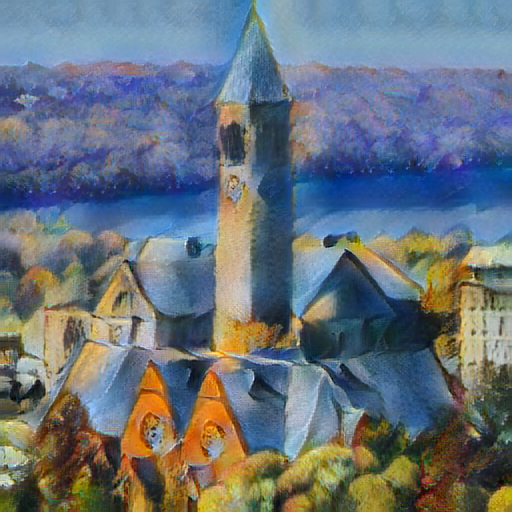

In [18]:
stylize(model,
        path2content='cornell university.jpg',
        styles=[
            Style('woman with a hat.jpg'),
        ],
        dir2save=output_dir,
        save_color=True,
        )

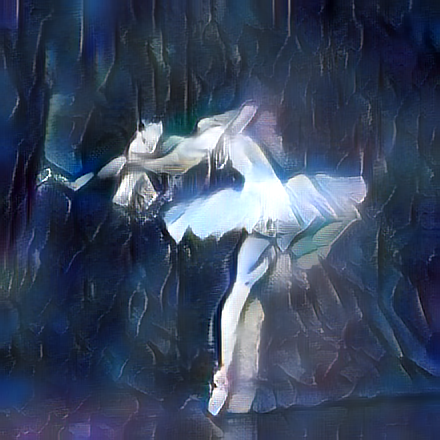

In [19]:
stylize(model,
        path2content='dancing.jpg',
        styles=[
            Style('picasso.jpg', weight=0.5),
            Style('lightning.jpg', weight=0.5),
        ],
        dir2save=output_dir,
        save_color=False,
)

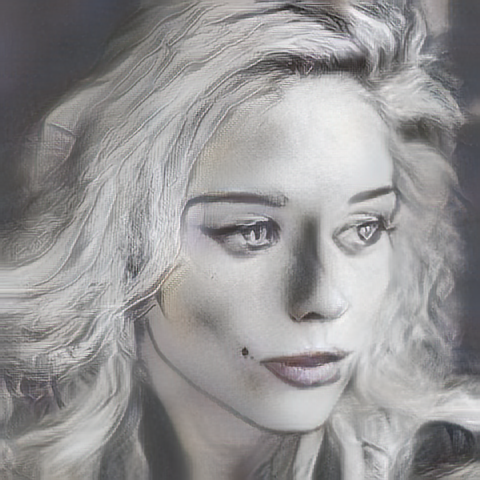

In [20]:
stylize(model,
        path2content='woman.jpeg',
        styles=[
            Style('pencil 1.jpg', weight=0.1),
            Style('pencil 2.jpg', weight=0.1),
            Style('pencil 3.jpg', weight=0.3, color_target=True),
        ],
        dir2save=output_dir,
        save_color=True,
        )